In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

## KNN Algorithm

### sklearn 붓꽃 데이터 사용 그룹: 1,2,3 색으로 나누기.

In [2]:
iris = datasets.load_iris()
# 입력 arr , feature를 두개로 제한하여 2차원 상에서 보기쉽게 표현
# 꽃밭침 길이 / 넓이 
iris_x = iris.data[:,:2]
# 정답 arr
iris_y = iris.target
# 모델생성
model = neighbors.KNeighborsClassifier(6)
# 학습
model.fit(iris_x,iris_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [6]:
# 모델 예측 
model.predict([[9,2.5],[3.5, 11]])

array([2, 0])

#### 시각화

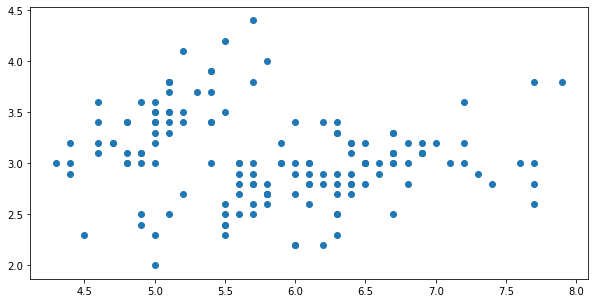

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(iris_x[:,0],iris_x[:,1])
plt.show()

Text(0.5, 1.0, 'iris KNN k=2')

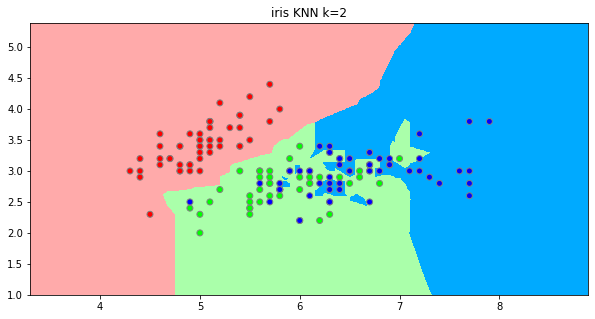

In [8]:
model = neighbors.KNeighborsClassifier(2)
model.fit(iris_x,iris_y)

# 도화지의 범위를 정해줘야함. x축과 y축의 최소값 최대값을계산
max_x, min_x = iris_x[:,0].max()+1, iris_x[:,0].min()-1
max_y, min_y = iris_x[:,1].max()+1, iris_x[:,1].min()-1
x1, y1 = np.meshgrid(np.arange(min_x, max_x, 0.01),np.arange(min_y, max_y,0.01))

# 모든 XY 좌표계에 KNN예측
mo = model.predict(np.c_[x1.ravel(),y1.ravel()])
mo = mo.reshape(x1.shape)

# 색상지정 배경데이터 색 / 실제데이터 색 두 색이 같으면 보기 어려움
color = ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF'])
color_ = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(x1,y1,mo, cmap=color)
plt.scatter(iris_x[:,0],iris_x[:,1],c=iris_y,cmap=color_,edgecolors='gray')
plt.xlim(x1.min(),x1.max())
plt.ylim(y1.min(),y1.max())
plt.title('iris KNN k=2')